# Libraries

In [1]:
!pip install ydata-profiling
!pip install optuna
!pip install optuna-integration[xgboost]
!pip install catboost
!pip install shap

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import warnings
from ydata_profiling import ProfileReport
from collections import Counter
from imblearn.over_sampling import ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from optuna.integration import XGBoostPruningCallback
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import LabelBinarizer
from itertools import combinations
from sklearn.metrics import roc_auc_score
import lightgbm as ltb
import optuna
from sklearn.metrics import log_loss
import shap
from sklearn.ensemble import IsolationForest
warnings.filterwarnings('ignore')

# Loading Data

In [3]:
student = pd.read_csv('dataset.csv')
pd.set_option('display.max_columns', None)

In [4]:
student

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Data Quality

In [5]:
# finding null
student.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [6]:
student.duplicated().sum()

0

# Exploratory Data Analysis

In [7]:
# check the shape of the dataset
student.shape

(4424, 35)

In [8]:
# check the columns
student.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [9]:
student.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [10]:
# Check info about all the columns
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

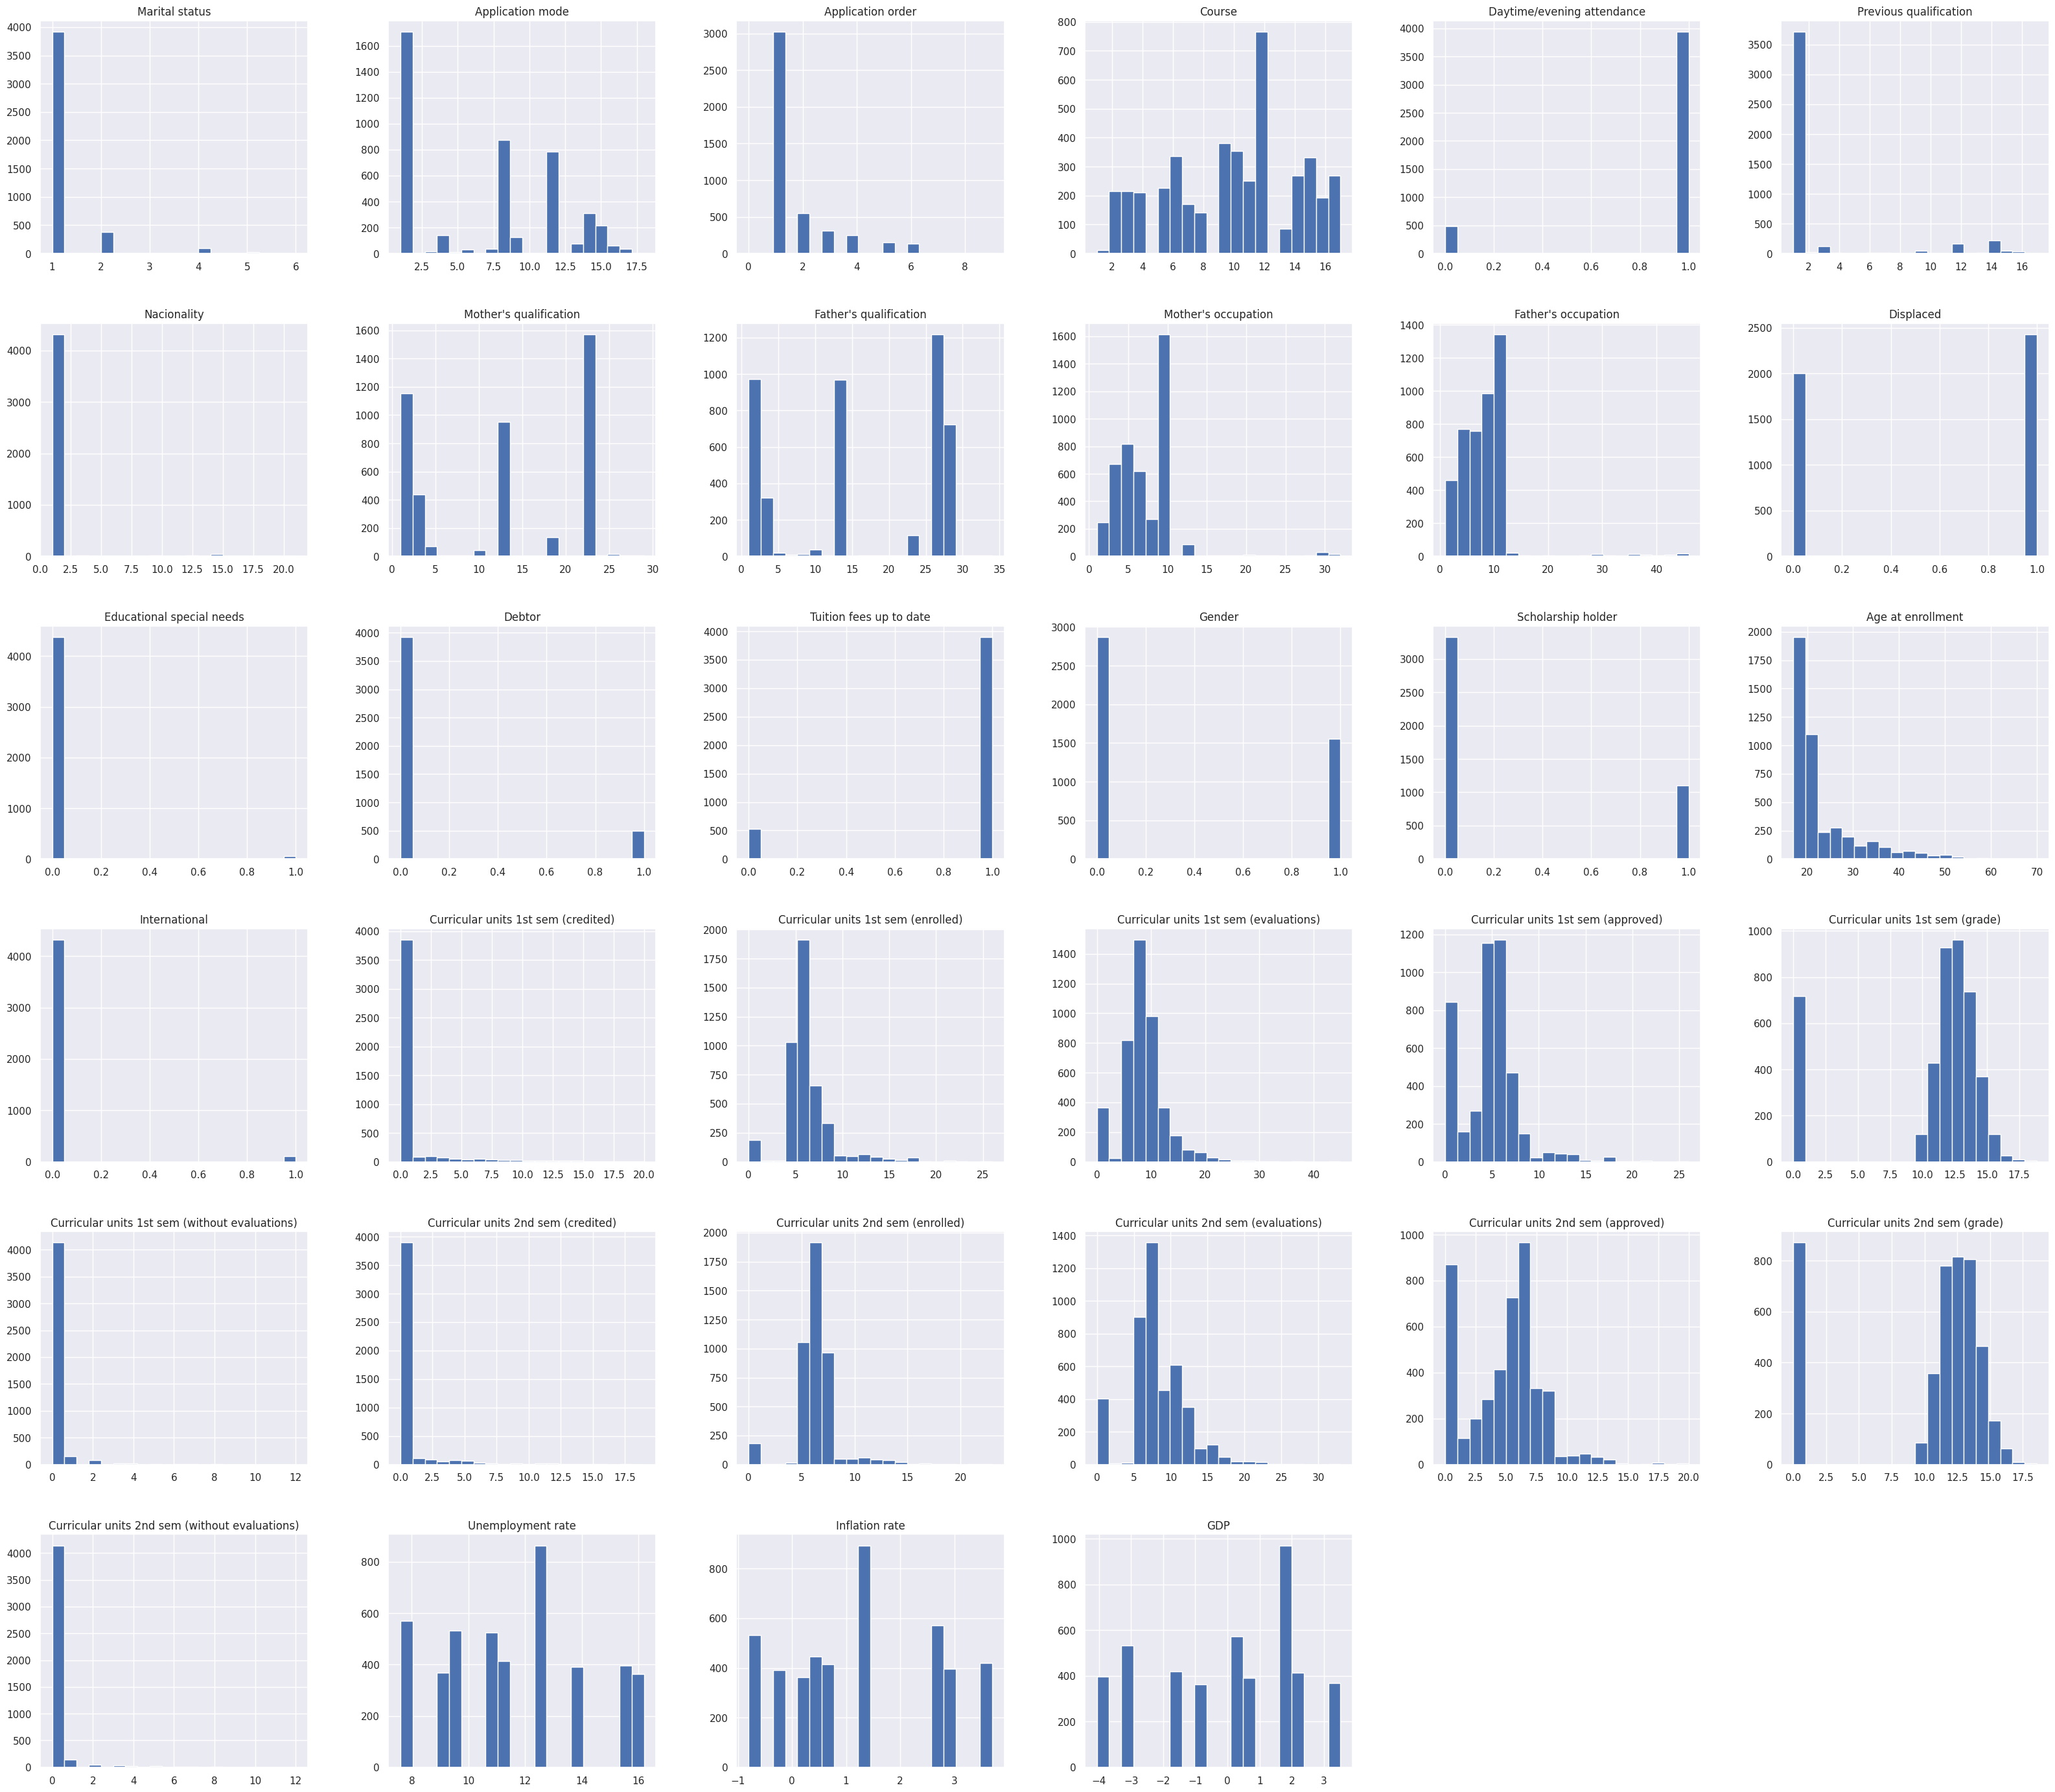

In [11]:
# histogram
sns.set_theme(style = 'darkgrid')
student.hist(bins=20, figsize=(40, 35), grid=True, legend=None);

In [12]:
student['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

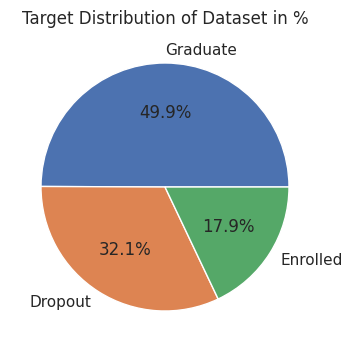

In [13]:
# Store the value counts in a variable
students_target = student['Target'].value_counts()

# Create a DataFrame for Seaborn
students_target_df = students_target.reset_index()
students_target_df.columns = ['Target', 'Count']

# Calculate percentages
students_target_df['Percentage'] = (students_target_df['Count'] / students_target_df['Count'].sum()) * 100

# Visualize the target variable using Matplotlib's pie chart
plt.figure(figsize=(4, 5))
plt.pie(students_target_df['Count'], labels=students_target_df['Target'], autopct='%1.1f%%')
plt.title('Target Distribution of Dataset in %')
plt.show()

In [14]:
student['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


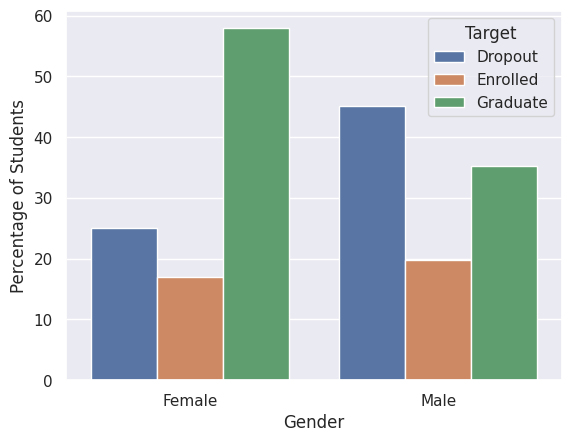

In [15]:
student['Total'] = student.groupby('Gender')['Gender'].transform('count')
student['Percentage'] = student.groupby(['Gender', 'Target'])['Target'].transform('count') / student['Total'] * 100
sns.barplot(data=student, x='Gender', y='Percentage', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.ylabel('Percentage of Students')
plt.show()

In [16]:
student['Gender'].value_counts()

,count
Gender,
0,2868
1,1556


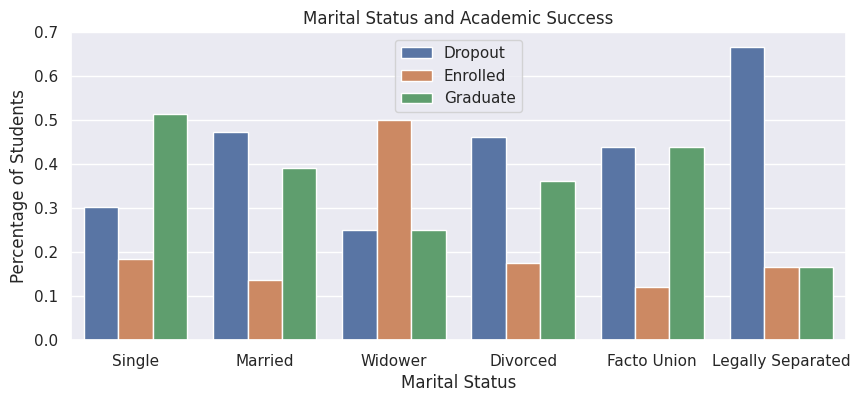

In [17]:
crosstab = pd.crosstab(student["Marital status"], student["Target"], normalize='index').reset_index()

# Melt the crosstab for seaborn
crosstab_melted = crosstab.melt(id_vars='Marital status', var_name='Target', value_name='Percentage')

# Create the bar plot
plt.figure(figsize=(10, 4))
sns.barplot(data=crosstab_melted, x='Marital status', y='Percentage', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

# Customize the x-ticks
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Separated'])

# Set the labels and title
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Students')
plt.title('Marital Status and Academic Success')
plt.legend(loc='upper center')
plt.show()

In [18]:
student.loc[:,'Marital status'].value_counts()

,count
Marital status,
1,3919
2,379
4,91
5,25
6,6
3,4


* Students who are legally seperated stand a high chance of dropping out.¶
* Single students have more chance of graduating as their focus
* Marriend and divorced individuals have more chances of dropping out but the gap between dropping out and graduating is small.

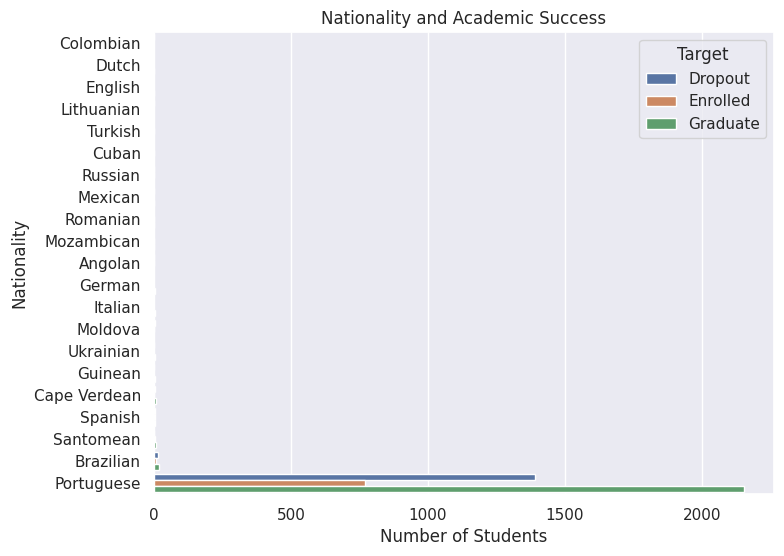

In [19]:
student_nationality = student.groupby(['Nacionality', 'Target']).size().reset_index().pivot(columns='Target', index='Nacionality', values=0)
student_nationality = student_nationality.rename(index={1:'Portuguese', 2:'German', 3:'Spanish', 4:'Italian', 5:'Dutch', 6:'English', 7:'Lithuanian', 8:'Angolan', 9:'Cape Verdean', 10:'Guinean', 11:'Mozambican', 12:'Santomean', 13:'Turkish', 14:'Brazilian', 15:'Romanian', 16:'Moldova', 17:'Mexican', 18:'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'})

# Calculate the total number of students for each nationality
student_nationality_total = student_nationality.sum(axis=1)
# Sort the nationalities by the total number of students
student_nationality_sorted = student_nationality_total.sort_values(ascending=True)
# Melt the DataFrame for seaborn
student_nationality_melted = student_nationality.loc[student_nationality_sorted.index].reset_index().melt(id_vars='Nacionality', var_name='Target', value_name='Number of Students')
# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=student_nationality_melted, y='Nacionality', x='Number of Students', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'], orient='h', dodge=True)

# Set the labels
plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.title('Nationality and Academic Success')
plt.show()

The data comprises of students of portugese descent only, which accounts for the highest frequency among all the nationalities. This means that the nationality feature is not a good predictor or an explanatory variable for the outcome of student dropout. So it can be removed.

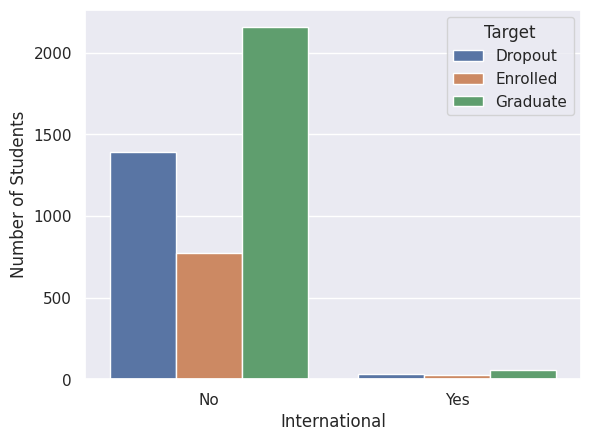

In [20]:
sns.countplot(data=student, x='International', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

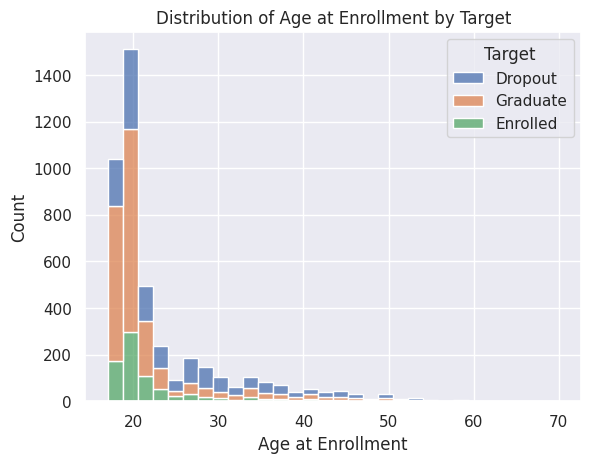

In [92]:
# Create a histogram of 'Age at enrollment' split by 'Target'
sns.histplot(data=student, x='Age at enrollment', hue='Target', multiple='stack', bins=30)

# Add titles and labels
plt.title('Distribution of Age at Enrollment by Target')
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')

# Show plot
plt.show()

The data is dominated by students of the portugese nationality and thus can explain the above bar plot. The internation feature is also not a good predictor and thus can be removed.

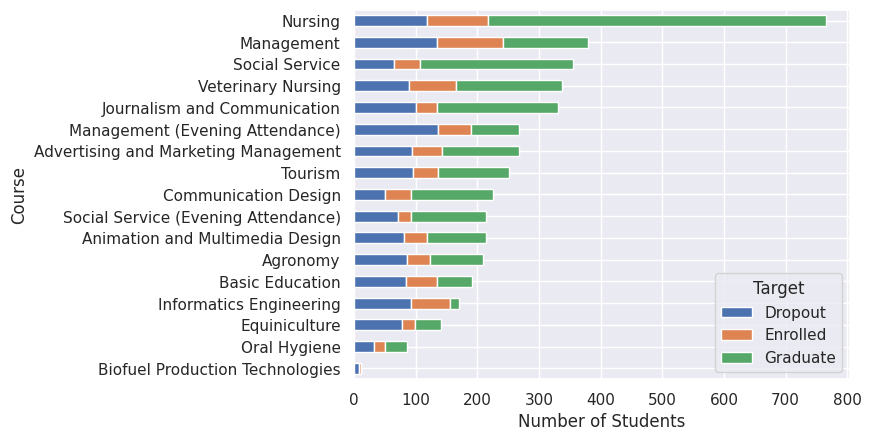

In [21]:
# Student's course affecting the academic success of students
student_course = student.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Let's rename the index of the DataFrame
student_course = student_course.rename(index={
    1:'Biofuel Production Technologies',
    2:'Animation and Multimedia Design',
    3:'Social Service (Evening Attendance)',
    4:'Agronomy',5:'Communication Design',
    6:'Veterinary Nursing',
    7:'Informatics Engineering',
    8:'Equiniculture',
    9:'Management',
    10:'Social Service',
    11:'Tourism',
    12:'Nursing',
    13:'Oral Hygiene',
    14:'Advertising and Marketing Management',
    15:'Journalism and Communication',
    16:'Basic Education',
    17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

Nursing course produced the highest number of graduates while management course produced the highest number of dropouts.

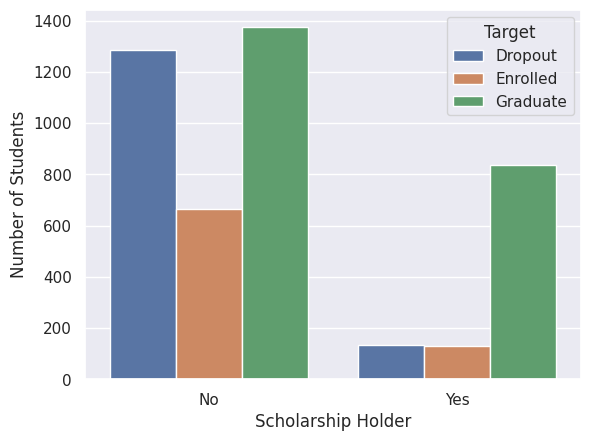

In [22]:
# Scholarship holders and the academic success of students
sns.countplot(data=student, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

From the above graph, we can deduce that students with scholaships have higher chances of graduating than dropping out.

# Date preprocessing

In [23]:
# Create a variable for all the features to be removed
features_tobe_removed = ['Nacionality']
features_tobe_removed.extend(['International'])
features_tobe_removed

['Nacionality', 'International']

In [24]:
student = pd.read_csv('dataset.csv')
s_df = student.copy()
# s_df['Target'] = LabelEncoder().fit_transform(student['Target'])
s_df['Target'] = student['Target'].map({
    'Dropout':1,
    'Enrolled':2,
    'Graduate':0
})
s_df.loc[:,'Target'].value_counts()

,count
Target,
0,2209
1,1421
2,794


In [25]:
s_df.corr()['Target']

,Target
Marital status,0.037198
Application mode,0.147498
Application order,-0.080020
Course,-0.018190
Daytime/evening attendance,-0.027193
Previous qualification,0.044766
Nacionality,0.013989
Mother's qualification,-0.020063
Father's qualification,-0.030781
Mother's occupation,0.014203


<Axes: >

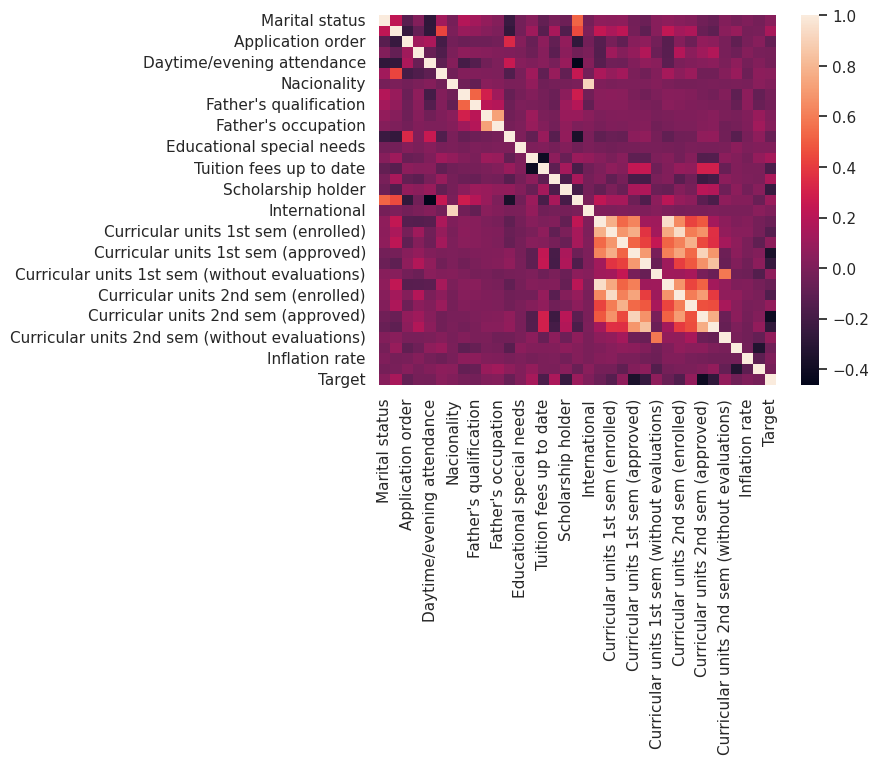

In [26]:
sns.heatmap(s_df.corr())

# Identifying outliers

In [28]:
# Calculating the Z-score for each data point
z_scores = np.abs(stats.zscore(s_df))
# Finding data points with a Z-score greater than 3
outliers = np.where(z_scores > 3)

# Dropping the corresponding rows from the dataframe
out_df = s_df.drop(s_df.index[outliers[0]])

# Resetting the index of the dataframe
s_df = out_df.reset_index(drop=True)
s_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,1,1,1,8,1,1,1,3,28,4,6,1,0,0,1,0,0,18,0,0,5,6,5,11.800000,1,0,5,8,5,11.600000,0,9.4,-0.8,-3.12,0
3533,1,1,1,5,1,1,1,1,1,10,10,1,0,0,1,0,1,20,0,0,6,6,6,13.833333,0,0,6,6,6,13.500000,0,16.2,0.3,-0.92,0
3534,1,15,1,5,1,14,1,3,28,4,10,0,0,0,1,1,0,20,0,2,7,7,6,12.500000,0,5,9,10,7,13.142857,1,16.2,0.3,-0.92,0
3535,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1


In [29]:
# Changing the Target to numerical Value 0 or 1.
# We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
s_df = s_df[s_df.Target != 2]
s_df.loc[:,'Target'].value_counts()

,count
Target,
0,1791
1,1116


In [30]:
s_df.drop(features_tobe_removed, axis=1, inplace=True)
s_df.shape

(2907, 33)

# Resampling - SMOTE, ADASYN & Stratify

In [32]:
# Extract Input & Output Columns
X = s_df.iloc[:,0:-1]
Y = s_df.iloc[:,-1]
Y

,Target
0,1
1,0
2,1
3,0
4,0
...,...
3532,0
3533,0
3534,0
3535,1


In [33]:
resample_smote = SMOTE(random_state=42)
X_smote, Y_smote = resample_smote.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_smote))

Resampled dataset shape Counter({1: 1791, 0: 1791})


In [34]:
resample_ada = ADASYN(random_state=42)
X_ada, Y_ada = resample_ada.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_ada))

Resampled dataset shape Counter({1: 1847, 0: 1791})


In [35]:
X_train_smote,X_test_smote,Y_train_smote,Y_test_smote = train_test_split(X_smote,Y_smote,test_size=0.2, random_state=42)

In [36]:
X_train_ada,X_test_ada,Y_train_ada,Y_test_ada = train_test_split(X_ada,Y_ada,test_size=0.2, random_state=42)

In [37]:
# Standardization
z = s_df["Target"]
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

X_train_stratify, X_test_stratify, Y_train_stratify, Y_test_stratify = train_test_split(scaled, z, test_size=0.2, random_state=42, stratify=s_df["Target"])

In [38]:
dt_smote = DecisionTreeClassifier(random_state=42)
dt_ada = DecisionTreeClassifier(random_state=42)
dt_stratify = DecisionTreeClassifier(random_state=42)

In [39]:
dt_smote = dt_smote.fit(X_train_smote,Y_train_smote)
dt_ada = dt_ada.fit(X_train_ada,Y_train_ada)
dt_stratify = dt_ada.fit(X_train_stratify, Y_train_stratify)

In [40]:
pred_smote = dt_smote.predict(X_test_smote)
pred_ada = dt_ada.predict(X_test_ada)
pred_stratify = dt_ada.predict(X_test_stratify)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       344
           1       0.86      0.86      0.86       373

    accuracy                           0.85       717
   macro avg       0.85      0.85      0.85       717
weighted avg       0.85      0.85      0.85       717



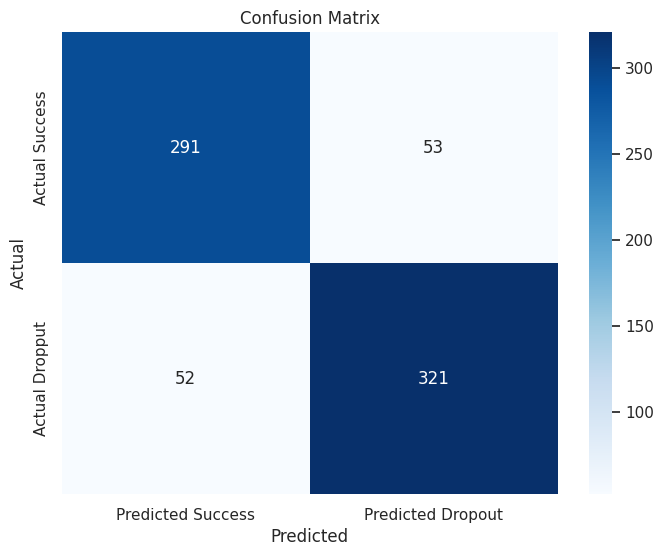

In [41]:
print(classification_report(Y_test_smote, pred_smote))
# Compute the confusion matrix
cm = confusion_matrix(Y_test_smote, pred_smote)
# Convert the confusion matrix to a Pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Success', 'Actual Dropput'], columns=['Predicted Success', 'Predicted Dropout'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.53      0.97      0.68       354
           1       0.86      0.18      0.29       374

    accuracy                           0.56       728
   macro avg       0.69      0.57      0.49       728
weighted avg       0.70      0.56      0.48       728



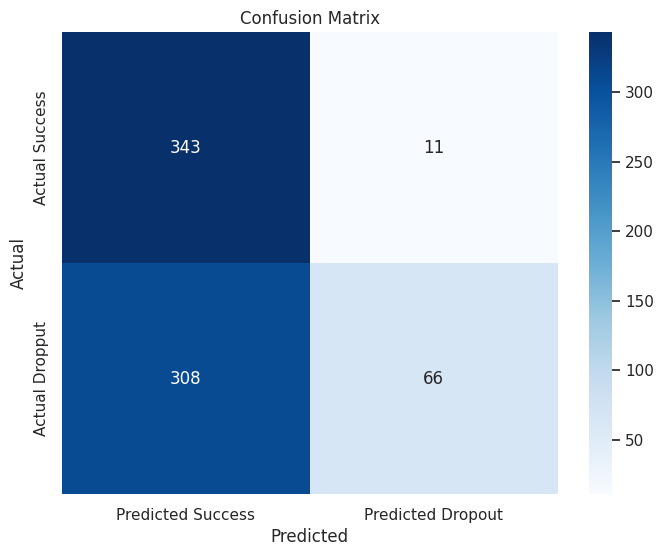

In [42]:

print(classification_report(Y_test_ada, pred_ada))
# Compute the confusion matrix
cm = confusion_matrix(Y_test_ada, pred_ada)
# Convert the confusion matrix to a Pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Success', 'Actual Dropput'], columns=['Predicted Success', 'Predicted Dropout'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       359
           1       0.81      0.86      0.83       223

    accuracy                           0.87       582
   macro avg       0.86      0.86      0.86       582
weighted avg       0.87      0.87      0.87       582



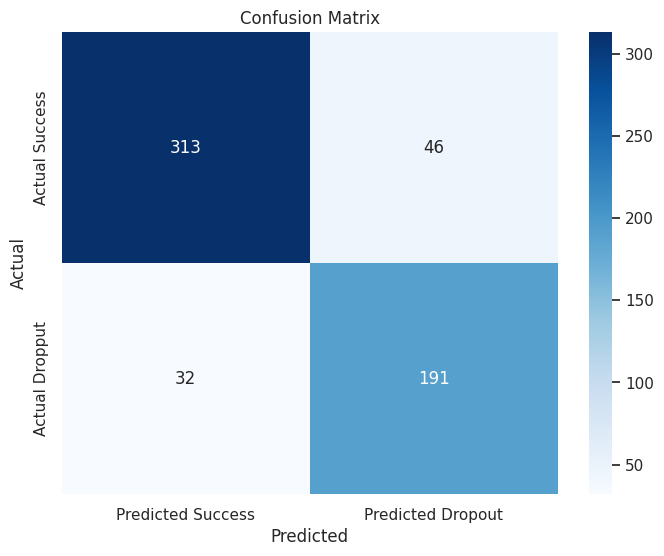

In [43]:
print(classification_report(Y_test_stratify, pred_stratify))
# Compute the confusion matrix
cm = confusion_matrix(Y_test_stratify, pred_stratify)
# Convert the confusion matrix to a Pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Success', 'Actual Dropput'], columns=['Predicted Success', 'Predicted Dropout'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# PART 1 => ML Supervised Models (traditional algorithms)

## 1) Decision Tree

In [44]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train_smote,Y_train_smote)
dt_pred = dt.predict(X_test_smote)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       344
           1       0.86      0.86      0.86       373

    accuracy                           0.85       717
   macro avg       0.85      0.85      0.85       717
weighted avg       0.85      0.85      0.85       717



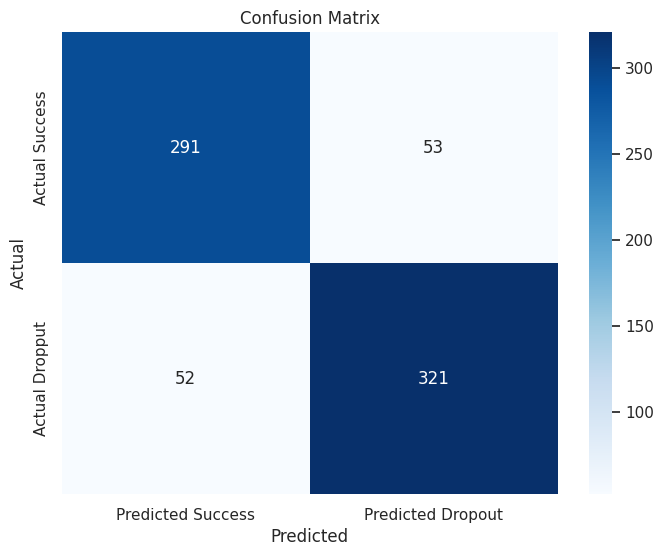

In [45]:
print(classification_report(Y_test_smote, pred_smote))
# Compute the confusion matrix
cm = confusion_matrix(Y_test_smote, pred_smote)
# Convert the confusion matrix to a Pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Success', 'Actual Dropput'], columns=['Predicted Success', 'Predicted Dropout'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree - Hyperparameter optimization using Optuna

In [46]:
def dtree_objective(trial):

    md = trial.suggest_int('max_depth', 2, 64)
    mi = trial.suggest_int('min_samples_leaf', 1, 32)
    crit = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])

    clf =  DecisionTreeClassifier(max_depth=md, min_samples_leaf=mi,criterion=crit, random_state=42, )
    scores = cross_val_score(clf, X_train_smote, Y_train_smote, cv=10, scoring='f1_weighted')

    return scores.mean()

dtree_study = optuna.create_study(direction='maximize')
dtree_study.optimize(dtree_objective, n_trials=20)

[I 2024-09-04 10:37:53,876] A new study created in memory with name: no-name-8596e941-9e2b-46fc-ba62-ce2b634eb8ef
[I 2024-09-04 10:37:54,459] Trial 0 finished with value: 0.8941596480210532 and parameters: {'max_depth': 22, 'min_samples_leaf': 11, 'criterion': 'gini'}. Best is trial 0 with value: 0.8941596480210532.
[I 2024-09-04 10:37:55,208] Trial 1 finished with value: 0.8941596480210532 and parameters: {'max_depth': 45, 'min_samples_leaf': 11, 'criterion': 'gini'}. Best is trial 0 with value: 0.8941596480210532.
[I 2024-09-04 10:37:55,640] Trial 2 finished with value: 0.8915729828241379 and parameters: {'max_depth': 8, 'min_samples_leaf': 22, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.8941596480210532.
[I 2024-09-04 10:37:56,122] Trial 3 finished with value: 0.8940397448152391 and parameters: {'max_depth': 17, 'min_samples_leaf': 19, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8941596480210532.
[I 2024-09-04 10:37:56,414] Trial 4 finished with value: 0.88094

In [47]:
print(dtree_study.best_value)
print(dtree_study.best_params)

0.8975800038965334
{'max_depth': 22, 'min_samples_leaf': 17, 'criterion': 'gini'}


In [48]:
dt_opt = DecisionTreeClassifier(**dtree_study.best_params, random_state=42)
dt_opt = dt_opt.fit(X_train_smote,Y_train_smote)
dt_pred_opt = dt_opt.predict(X_test_smote)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       344
           1       0.90      0.87      0.89       373

    accuracy                           0.89       717
   macro avg       0.89      0.89      0.89       717
weighted avg       0.89      0.89      0.89       717



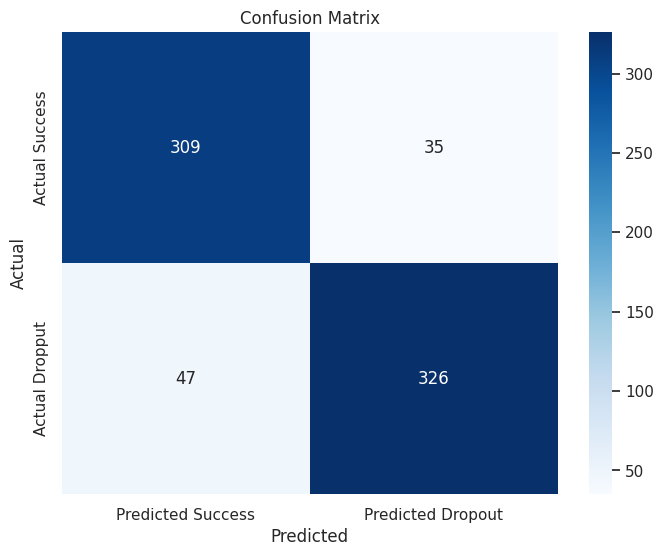

In [49]:
print(classification_report(Y_test_smote,dt_pred_opt))
# Compute the confusion matrix
cm = confusion_matrix(Y_test_smote, dt_pred_opt)
# Convert the confusion matrix to a Pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Success', 'Actual Dropput'], columns=['Predicted Success', 'Predicted Dropout'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2) Random Forest

In [50]:
rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_train_smote,Y_train_smote)
rf_pred = rf.predict(X_test_smote)

In [51]:
print(classification_report(Y_test_smote,rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       344
           1       0.94      0.89      0.91       373

    accuracy                           0.91       717
   macro avg       0.91      0.91      0.91       717
weighted avg       0.91      0.91      0.91       717



### Random Forest - Hyperparameter optimization using Optuna

In [52]:
def rf_objective(trial):

    md = trial.suggest_int('max_depth', 2, 64)
    mi = trial.suggest_int('min_samples_leaf', 1, 32)
    crit = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])

    clf =  RandomForestClassifier(max_depth=md, min_samples_leaf=mi,criterion=crit, random_state=42, )
    scores = cross_val_score(clf, X_train_smote, Y_train_smote, cv=10, scoring='f1_weighted')

    return scores.mean()

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=20)

[I 2024-09-04 10:38:02,689] A new study created in memory with name: no-name-167d3f41-34eb-4c16-9c85-d01739e6d746
[I 2024-09-04 10:38:06,966] Trial 0 finished with value: 0.8990320949301163 and parameters: {'max_depth': 53, 'min_samples_leaf': 25, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8990320949301163.
[I 2024-09-04 10:38:10,756] Trial 1 finished with value: 0.9032025931653582 and parameters: {'max_depth': 6, 'min_samples_leaf': 9, 'criterion': 'gini'}. Best is trial 1 with value: 0.9032025931653582.
[I 2024-09-04 10:38:15,850] Trial 2 finished with value: 0.9074099939075072 and parameters: {'max_depth': 33, 'min_samples_leaf': 6, 'criterion': 'gini'}. Best is trial 2 with value: 0.9074099939075072.
[I 2024-09-04 10:38:19,321] Trial 3 finished with value: 0.9007765629245934 and parameters: {'max_depth': 9, 'min_samples_leaf': 19, 'criterion': 'entropy'}. Best is trial 2 with value: 0.9074099939075072.
[I 2024-09-04 10:38:22,602] Trial 4 finished with value: 0.895542452

In [53]:
print(rf_study.best_value)
print(rf_study.best_params)

0.9217326112922745
{'max_depth': 29, 'min_samples_leaf': 1, 'criterion': 'log_loss'}


In [54]:
rf_opt = RandomForestClassifier(**rf_study.best_params, random_state=42)
rf_opt = rf_opt.fit(X_train_smote,Y_train_smote)
rf_pred_opt = rf_opt.predict(X_test_smote)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       344
           1       0.93      0.88      0.90       373

    accuracy                           0.90       717
   macro avg       0.90      0.90      0.90       717
weighted avg       0.91      0.90      0.90       717



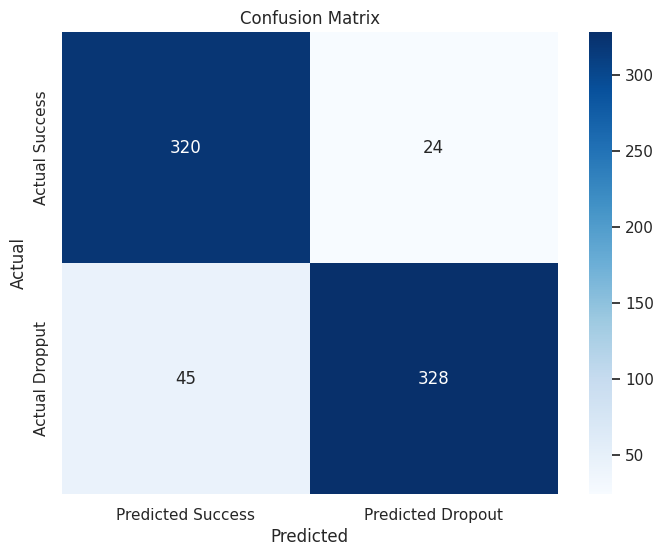

In [55]:
print(classification_report(Y_test_smote,rf_pred_opt))
# Compute the confusion matrix
cm = confusion_matrix(Y_test_smote, rf_pred_opt)
# Convert the confusion matrix to a Pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Success', 'Actual Dropput'], columns=['Predicted Success', 'Predicted Dropout'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [77]:
def lr_objective(trial):
    # Suggest hyperparameters for Logistic Regression
    c = trial.suggest_loguniform('C', 1e-5, 1e2)  # Regularization strength
    penalty = trial.suggest_categorical('penalty', ['l2', 'elasticnet', 'none'])

    # LogisticRegression has different options for 'penalty' which may need to match solver
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
        solver = 'saga'  # ElasticNet penalty only works with 'saga' solver
    else:
        l1_ratio = None
        if penalty == 'none':
            solver = 'lbfgs'
        else:
            solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'saga'])

    # Initialize Logistic Regression model
    clf = LogisticRegression(
        C=c,
        penalty=penalty,
        solver=solver,
        l1_ratio=l1_ratio,  # only used if penalty='elasticnet'
        random_state=42
    )

    # Cross-validation
    scores = cross_val_score(clf, X_train_smote, Y_train_smote, cv=10, scoring='f1_weighted')

    return scores.mean()

# Create and optimize the study
lr_study = optuna.create_study(direction='maximize')
lr_study.optimize(lr_objective, n_trials=20)

[I 2024-09-04 10:51:51,466] A new study created in memory with name: no-name-042fa94f-4e15-416e-996b-dab748a25c19
[I 2024-09-04 10:51:53,157] Trial 0 finished with value: 0.9136839933827974 and parameters: {'C': 1.1315282874804524e-05, 'penalty': 'none'}. Best is trial 0 with value: 0.9136839933827974.
[I 2024-09-04 10:51:56,409] Trial 1 finished with value: 0.9105254614104734 and parameters: {'C': 0.185708396821667, 'penalty': 'elasticnet', 'l1_ratio': 0.9179650581078818}. Best is trial 0 with value: 0.9136839933827974.
[I 2024-09-04 10:51:58,957] Trial 2 finished with value: 0.9136839933827974 and parameters: {'C': 11.612510541236464, 'penalty': 'none'}. Best is trial 0 with value: 0.9136839933827974.
[I 2024-09-04 10:52:00,642] Trial 3 finished with value: 0.8740789171839889 and parameters: {'C': 0.001354714296372258, 'penalty': 'elasticnet', 'l1_ratio': 0.28263992479080813}. Best is trial 0 with value: 0.9136839933827974.
[I 2024-09-04 10:52:02,189] Trial 4 finished with value: 0.9

In [78]:
print(rf_study.best_value)
print(rf_study.best_params)

0.9217326112922745
{'max_depth': 29, 'min_samples_leaf': 1, 'criterion': 'log_loss'}


In [80]:
lr_opt = LogisticRegression(**lr_study.best_params, random_state=42)
lr_opt = lr_opt.fit(X_train_smote,Y_train_smote)
lr_pred_opt = lr_opt.predict(X_test_smote)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       344
           1       0.91      0.87      0.89       373

    accuracy                           0.89       717
   macro avg       0.89      0.89      0.89       717
weighted avg       0.89      0.89      0.89       717



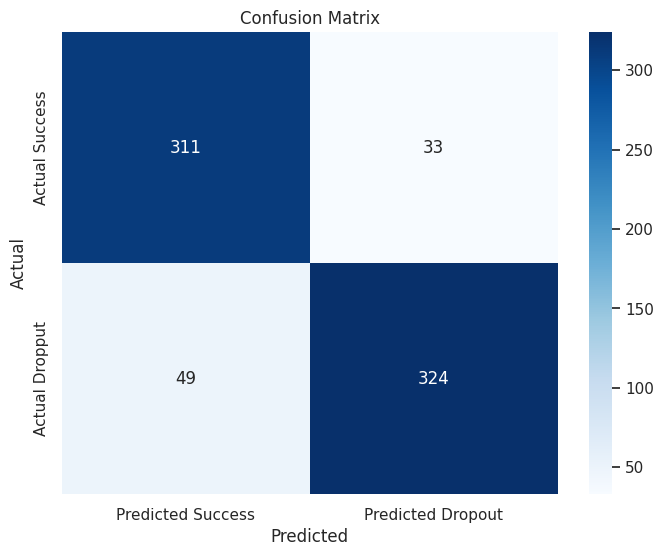

In [81]:
print(classification_report(Y_test_smote,lr_pred_opt))
# Compute the confusion matrix
cm = confusion_matrix(Y_test_smote, lr_pred_opt)
# Convert the confusion matrix to a Pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Success', 'Actual Dropput'], columns=['Predicted Success', 'Predicted Dropout'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3) Support Vector Machine (SVM)

In [56]:
svm = SVC(random_state=42)
svm = svm.fit(X_train_smote,Y_train_smote)
svm_pred = svm.predict(X_test_smote)

In [57]:
print(classification_report(Y_test_smote,svm_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       344
           1       0.90      0.83      0.86       373

    accuracy                           0.86       717
   macro avg       0.86      0.86      0.86       717
weighted avg       0.86      0.86      0.86       717



### SVM - Hyperparameter optimization using Optuna

In [58]:
# def svm_objective(trial):
#   svc_c = trial.suggest_float("C", 1e-10, 1e10, log=True)
#   kernel = trial.suggest_categorical('kernel', ['poly', 'rbf', 'sigmoid'])
#   gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
#   degree = trial.suggest_int('degree', 1, 5)


#   clf =  SVC(C = svc_c, kernel=kernel, gamma=gamma, degree=degree, random_state=42)
#   scores = cross_val_score(clf, X_train_smote, Y_train_smote, cv=10, scoring='f1_weighted')

#   return scores.mean()

# svm_study = optuna.create_study(direction='maximize')
# svm_study.optimize(svm_objective, n_trials=20)

In [59]:
# print(svm_study.best_value)
# print(svm_study.best_params)

In [60]:
# svm_opt = SVC(**svm_study.best_params, random_state=42)
# svm_opt = svm.fit(X_train_smote,Y_train_smote)
# svm_pred_opt = svm.predict(X_test_smote)

In [61]:
# print(classification_report(Y_test_smote,svm_pred_opt))

In [62]:
# svm_cm = confusion_matrix(Y_test_smote,svm_pred_opt)
# svm_cm = pd.DataFrame(svm_cm)
# plt.figure()
# sns_plot = sns.heatmap(svm_cm, annot=True,fmt='g', annot_kws={"fontsize":12})
# plt.ylabel("Actual", fontsize=12)
# plt.xlabel("Prediction",fontsize=12)
# plt.title("SVC",fontsize=14)

# PART 1 =>  ML Supervised Models (boosting algorithms)

## 1) CatBoost (CB)

In [71]:
cat = CatBoostClassifier(random_state = 42, verbose = 0)
cat = cat.fit(X_train_smote, Y_train_smote)
cat_pred = cat.predict(X_test_smote)

In [72]:
print(classification_report(Y_test_smote, cat_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       344
           1       0.93      0.88      0.91       373

    accuracy                           0.91       717
   macro avg       0.91      0.91      0.91       717
weighted avg       0.91      0.91      0.91       717



# SHAP - Randrom Forest

PermutationExplainer explainer: 718it [05:22,  2.19it/s]


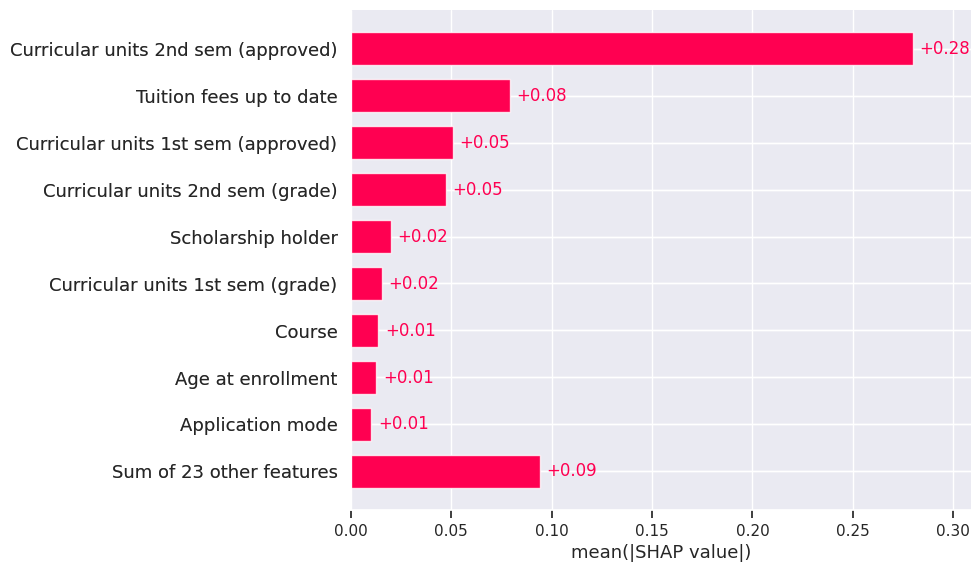

In [87]:
explainer = shap.Explainer(rf.predict, X_test_smote)
shap_values = explainer(X_test_smote)
shap.plots.bar(shap_values)

# SHAP - CatBoost

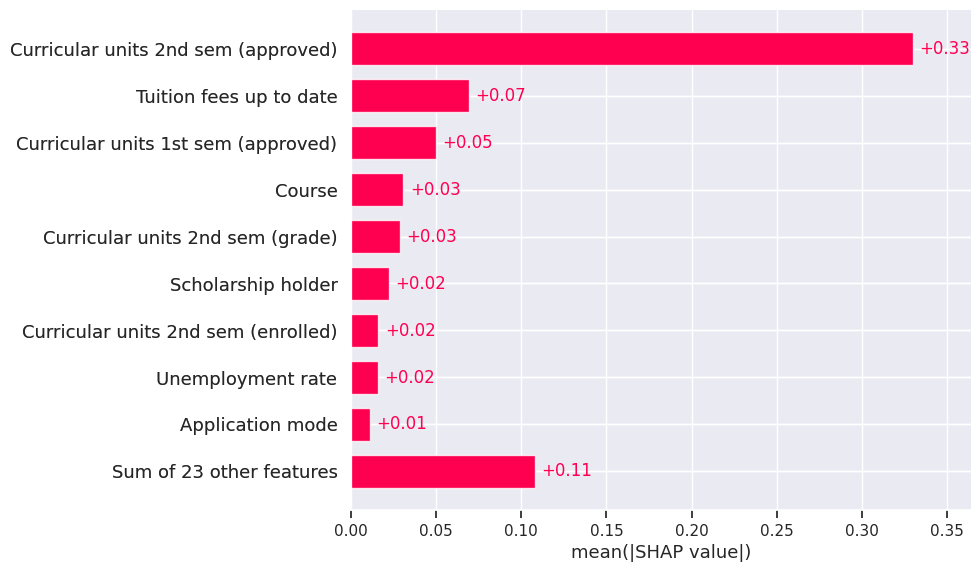

In [85]:
explainer = shap.Explainer(cat.predict, X_test_smote)
shap_values = explainer(X_test_smote)
shap.plots.bar(shap_values)